<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/Ampere_Law_Magnetic_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

長直導線磁場視覺化程式
選擇視覺化類型:
1. 2D 視覺化
2. 3D 視覺化
3. 兩種視覺化都執行
請輸入選項 (1/2/3): 3


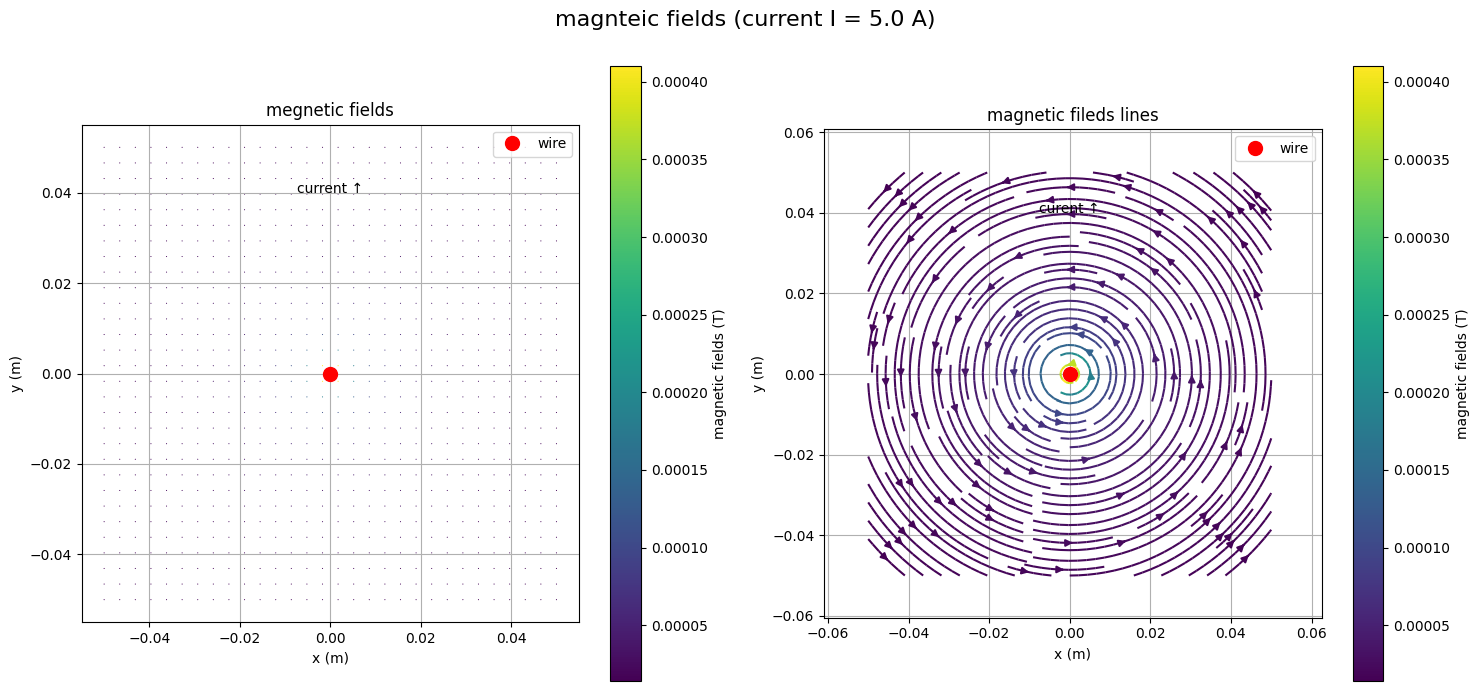

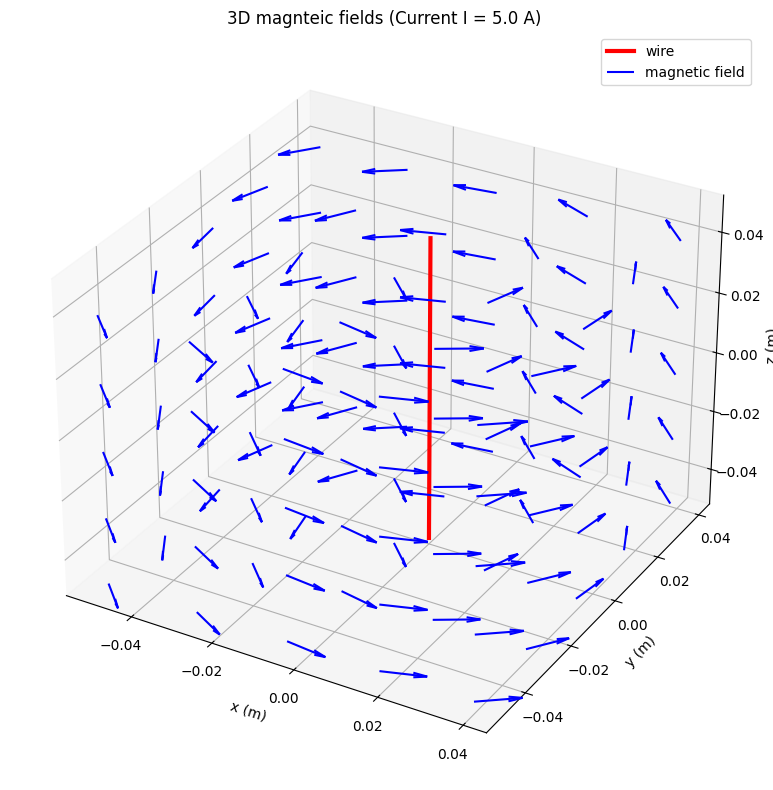

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_magnetic_field_2d():
    """
    繪製長直導線周圍的2D磁場
    """
    # 常數
    mu_0 = 4 * np.pi * 1e-7  # 真空磁導率 (H/m)
    I = 5.0  # 電流 (A)

    # 創建點陣
    x = np.linspace(-0.05, 0.05, 30)
    y = np.linspace(-0.05, 0.05, 30)
    X, Y = np.meshgrid(x, y)

    # 計算離導線的距離 (導線沿z軸穿過x=0, y=0)
    r = np.sqrt(X**2 + Y**2)

    # 避免在導線位置的除零問題
    epsilon = 1e-6
    r = np.where(r < epsilon, epsilon, r)

    # 使用比歐-沙伐定律計算磁場
    B_magnitude = (mu_0 * I) / (2 * np.pi * r)  # 磁場強度
    B_x = -B_magnitude * Y / r  # x方向分量
    B_y = B_magnitude * X / r   # y方向分量

    # 磁場強度用於顏色映射
    norm = np.sqrt(B_x**2 + B_y**2)

    # 設置圖形
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # 圖1: 磁場向量表示
    quiver = ax1.quiver(X, Y, B_x, B_y, norm, cmap='viridis', pivot='mid', scale=30)
    ax1.plot(0, 0, 'ro', markersize=10, label='wire')
    ax1.set_title('megnetic fields')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.text(0, 0.04, 'current ↑', ha='center')
    ax1.grid(True)
    ax1.set_aspect('equal')
    ax1.legend()

    # 為向量場添加顏色條
    cbar1 = fig.colorbar(quiver, ax=ax1, label='magnetic fields (T)')

    # 圖2: 磁場線表示
    streamplot = ax2.streamplot(X, Y, B_x, B_y, color=norm, cmap='viridis', density=1.5)
    ax2.plot(0, 0, 'ro', markersize=10, label='wire')
    ax2.set_title('magnetic fileds lines')
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')
    ax2.text(0, 0.04, 'curent ↑', ha='center')
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.legend()

    # 為流線圖添加顏色條
    cbar2 = fig.colorbar(streamplot.lines, ax=ax2, label='magnetic fields (T)')

    # 總標題
    plt.suptitle(f'magnteic fields (current I = {I} A)', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # 顯示圖形
    plt.show()

def plot_magnetic_field_3d():
    """
    繪製長直導線周圍的3D磁場
    """
    # 常數
    mu_0 = 4 * np.pi * 1e-7  # 真空磁導率 (H/m)
    I = 5.0  # 電流 (A)

    # 創建3D點陣
    x = np.linspace(-0.05, 0.05, 10)
    y = np.linspace(-0.05, 0.05, 10)
    z = np.linspace(-0.05, 0.05, 10)
    X, Y, Z = np.meshgrid(x, y, z)

    # 計算離導線的距離 (導線沿z軸穿過x=0, y=0)
    r = np.sqrt(X**2 + Y**2)

    # 避免在導線位置的除零問題
    epsilon = 1e-6
    r = np.where(r < epsilon, epsilon, r)

    # 計算磁場分量
    B_magnitude = (mu_0 * I) / (2 * np.pi * r)
    B_x = -B_magnitude * Y / r
    B_y = B_magnitude * X / r
    B_z = np.zeros_like(B_x)  # 無限長直導線沿z軸無z分量

    # 創建圖形
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 繪製導線為紅線
    wire_z = np.linspace(-0.05, 0.05, 100)
    wire_x = np.zeros_like(wire_z)
    wire_y = np.zeros_like(wire_z)
    ax.plot(wire_x, wire_y, wire_z, 'r-', linewidth=3, label='wire')

    # 使用quiver3d繪製磁場
    # 為清晰起見，只繪製部分點
    skip = 2
    ax.quiver(X[::skip, ::skip, ::skip],
              Y[::skip, ::skip, ::skip],
              Z[::skip, ::skip, ::skip],
              B_x[::skip, ::skip, ::skip],
              B_y[::skip, ::skip, ::skip],
              B_z[::skip, ::skip, ::skip],
              length=0.01,
              normalize=True,
              color='b',
              label='magnetic field')

    # 添加標籤和標題
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_title(f'3D magnteic fields (Current I = {I} A)')

    # 添加圖例
    ax.legend()

    # 顯示圖形
    plt.tight_layout()
    plt.show()

# 主函數
def main():
    print("長直導線磁場視覺化程式")
    print("選擇視覺化類型:")
    print("1. 2D 視覺化")
    print("2. 3D 視覺化")
    print("3. 兩種視覺化都執行")

    choice = input("請輸入選項 (1/2/3): ")

    if choice == '1':
        plot_magnetic_field_2d()
    elif choice == '2':
        plot_magnetic_field_3d()
    elif choice == '3':
        plot_magnetic_field_2d()
        plot_magnetic_field_3d()
    else:
        print("無效選項，默認執行2D視覺化")
        plot_magnetic_field_2d()

if __name__ == "__main__":
    main()
